In [1]:
# KNN Classification
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv('pima-indians-diabetes.data.csv', names = names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.iloc[:, 0:8]
Y = df.iloc[:, -1] # -1 means last column

In [15]:
model = KNeighborsClassifier(n_neighbors = 14)

In [16]:
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=14)

In [17]:
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv = kfold)

In [18]:
results

array([0.71428571, 0.81818182, 0.68831169, 0.64935065, 0.77922078,
       0.76623377, 0.80519481, 0.85714286, 0.75      , 0.73684211])

In [19]:
results.mean()

0.7564764183185235

In [20]:
model.predict([[1,85,66,29,0,26.6,0.351,31]])

array([0], dtype=int64)

In [21]:
model.predict([[9, 176, 57, 8, 10, 13.6, 1.489, 28]])

array([1], dtype=int64)

### Grid Search for Algorithm Tuning

In [12]:
n_neighbors = list(range(1,41)) # [1,2,4,...,40]
parameters = {'n_neighbors' : n_neighbors}

In [13]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [14]:
print(grid.best_score_)
print(grid.best_params_)

0.7578558696205755
{'n_neighbors': 14}


### Visualizing the CV results

In [22]:
k_range = range(1, 41)
k_scores = []

# use iteration to caclulator different k in models
# then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())

In [23]:
k_scores

[0.662821492233257,
 0.6940497411085647,
 0.7135557253204311,
 0.7213564213564213,
 0.723979288685171,
 0.727900857312622,
 0.7357185298361768,
 0.7500381970970207,
 0.7422120363296834,
 0.7448009506833035,
 0.748731007554537,
 0.7526355996944233,
 0.7552584670231729,
 0.7578558696205755,
 0.7383668618962738,
 0.7435277141159494,
 0.7513708513708514,
 0.748756472285884,
 0.7500806383159324,
 0.7487734487734488,
 0.7435786435786437,
 0.7461420932009167,
 0.7435362023597317,
 0.7435362023597317,
 0.737034207622443,
 0.7409303115185468,
 0.7409472880061115,
 0.7383074441897971,
 0.7421950598421188,
 0.7461166284695697,
 0.7447924624395212,
 0.7461081402257873,
 0.746125116713352,
 0.7474323062558357,
 0.7487140310669722,
 0.7474238180120534,
 0.743519225872167,
 0.739597657244716,
 0.7448179271708684,
 0.7369917664035311]

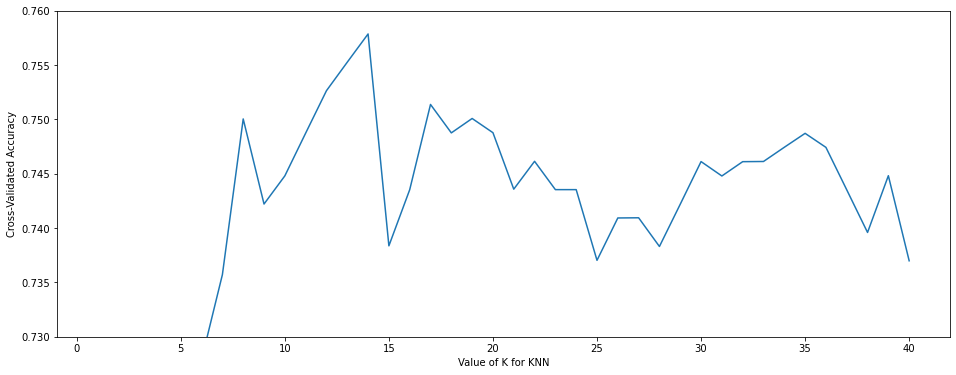

In [25]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.ylim(0.73,0.76)
plt.show()

In [26]:
df_accuracy = pd.DataFrame({'Value of k' : range(1,41),
                            'Accuracy' : k_scores})
df_accuracy

,Value of k,Accuracy
0,1,0.662821
1,2,0.694050
2,3,0.713556
3,4,0.721356
4,5,0.723979
5,6,0.727901
6,7,0.735719
7,8,0.750038
8,9,0.742212
9,10,0.744801


In [27]:
df_accuracy.sort_values('Accuracy', ascending = False)

,Value of k,Accuracy
13,14,0.757856
12,13,0.755258
11,12,0.752636
16,17,0.751371
18,19,0.750081
7,8,0.750038
19,20,0.748773
17,18,0.748756
10,11,0.748731
34,35,0.748714


In [ ]:
#This is illustration of GridSearchCV
'''
DecisionTreeClassifier(criterion = 'gini', max_depth = 4, max_features = 'sqrt')

DecisionTreeClassifier(criterion = 'gini', max_depth = 6, max_features = 'sqrt')

DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, max_features = 'sqrt')

DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, max_features = 'sqrt')

DecisionTreeClassifier(criterion = 'gini', max_depth = 14, max_features = 'sqrt')

DecisionTreeClassifier(criterion = 'gini', max_depth = 4, max_features = 'log2')

mydict = {'criterion' : ['gini','entropy'],
          'max_depth' : [1,2,3,4,5,6,7,8],
          'max_features' : ['sqrt','log2','auto']}

model = DecisionTreeClassifier()

g = GridSearchCV(estimator = model, param_grid = mydict)

g.fit(X,Y)

g.best_score_

g.best_params_

entropy, 6, log2
'''